<a href="https://colab.research.google.com/github/jasondupree/jasondupree.github.io/blob/main/Model%20Selection%20(KDE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX3

## Question One

We saw in class an example of where the normal distribution is a poor fit to log daily stock returns. Does the validity of the normal approximation improve when switching to weekly or monthly returns? Make a convincing argument, using both plots and formal model selection tools.

[*********************100%%**********************]  1 of 1 completed


Number of daily returns: 2262
Number of weekly returns: 468
Number of monthly returns: 107


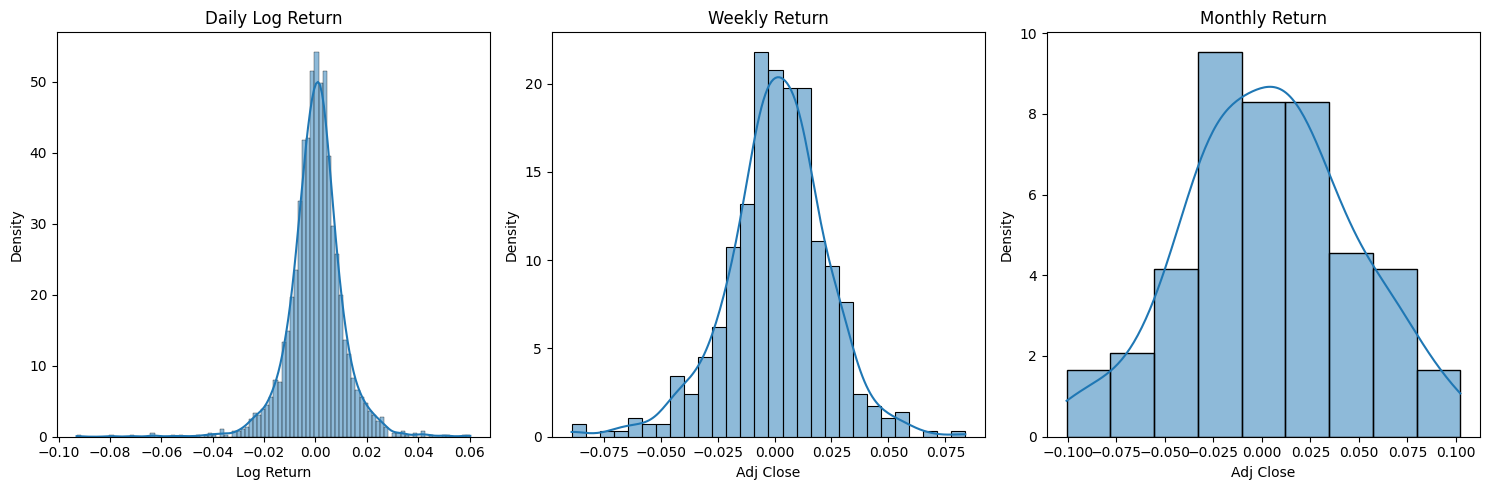

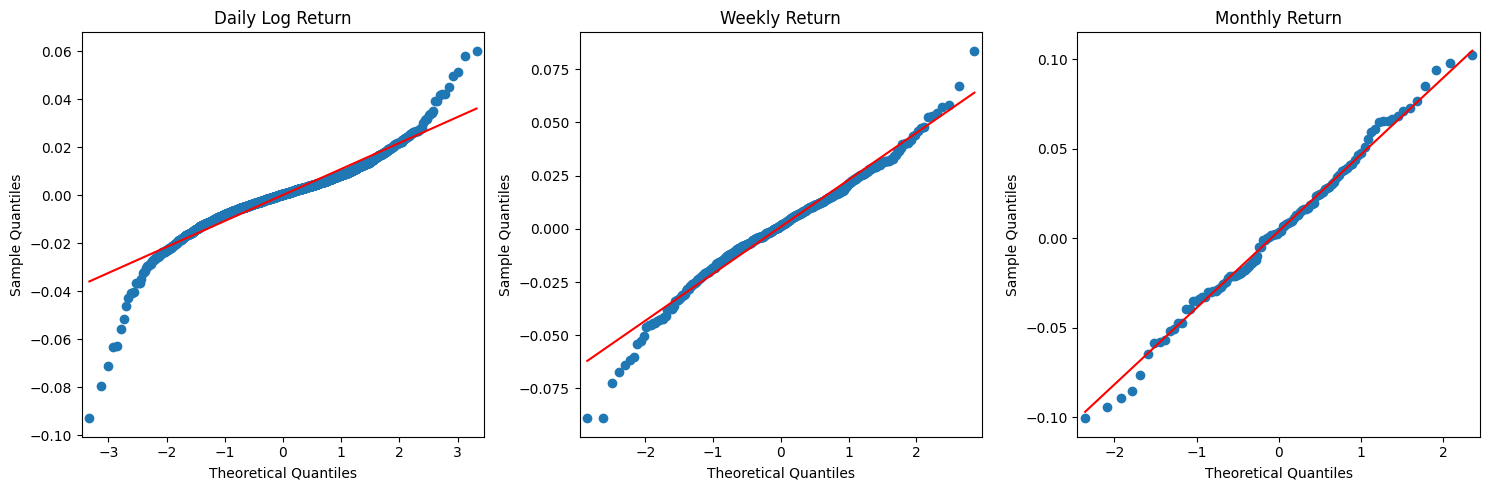

Daily returns: Shapiro-Wilk test statistic=0.9228176474571228, p-value=1.4187172093820717e-32
Weekly returns: Shapiro-Wilk test statistic=0.9787137508392334, p-value=2.377157215960324e-06
Monthly returns: Shapiro-Wilk test statistic=0.9924719929695129, p-value=0.8245428204536438


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, shapiro, t
import statsmodels.api as sm

# Download stock data
stock_data = yf.download("K", start="2010-01-01", end="2018-12-31")

# Compute log returns
stock_data['Log Return'] = np.log(stock_data['Adj Close']).diff()

# Compute weekly and monthly returns
weekly_return = stock_data['Adj Close'].resample('W').ffill().pct_change().dropna()
monthly_return = stock_data['Adj Close'].resample('M').ffill().pct_change().dropna()

# Print number of data points for verification
print(f"Number of daily returns: {stock_data['Log Return'].dropna().shape[0]}")
print(f"Number of weekly returns: {weekly_return.shape[0]}")
print(f"Number of monthly returns: {monthly_return.shape[0]}")

# Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(stock_data['Log Return'].dropna(), kde=True, stat="density", ax=axes[0])
axes[0].set_title('Daily Log Return')
sns.histplot(weekly_return, kde=True, stat="density", ax=axes[1])
axes[1].set_title('Weekly Return')
sns.histplot(monthly_return, kde=True, stat="density", ax=axes[2])
axes[2].set_title('Monthly Return')
plt.tight_layout()
plt.show()

# Q-Q plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sm.qqplot(stock_data['Log Return'].dropna(), line='s', ax=axes[0])
axes[0].set_title('Daily Log Return')
sm.qqplot(weekly_return, line='s', ax=axes[1])
axes[1].set_title('Weekly Return')
sm.qqplot(monthly_return, line='s', ax=axes[2])
axes[2].set_title('Monthly Return')
plt.tight_layout()
plt.show()

# Shapiro-Wilk test
daily_stat, daily_p = shapiro(stock_data['Log Return'].dropna())
weekly_stat, weekly_p = shapiro(weekly_return)
monthly_stat, monthly_p = shapiro(monthly_return)

print(f'Daily returns: Shapiro-Wilk test statistic={daily_stat}, p-value={daily_p}')
print(f'Weekly returns: Shapiro-Wilk test statistic={weekly_stat}, p-value={weekly_p}')
print(f'Monthly returns: Shapiro-Wilk test statistic={monthly_stat}, p-value={monthly_p}')

### Personal Interpretation Notes

Histograms and Q-Q Plots Interpretation

    Daily Log Return Histogram and Q-Q Plot:
        Histogram: The daily log returns show a peaked distribution around zero with heavy tails, indicating more extreme values than a normal distribution.
        Q-Q Plot: The Q-Q plot for daily log returns shows significant deviations from the red line, especially in the tails. This indicates that the daily log returns are not normally distributed.
        Shapiro-Wilk Test: The p-value is extremely low (1.41817289382717e-32), confirming that daily returns do not follow a normal distribution.

    Weekly Return Histogram and Q-Q Plot:
        Histogram: The weekly returns also show a peaked distribution around zero but with slightly less pronounced tails compared to the daily returns.
        Q-Q Plot: The Q-Q plot for weekly returns shows some deviations from the red line, but less so compared to the daily returns. This indicates a closer fit to normality than daily returns.
        Shapiro-Wilk Test: The p-value is 2.37715215096324e-06, still very low, suggesting weekly returns are not perfectly normal, but better than daily returns.

    Monthly Return Histogram and Q-Q Plot:
        Histogram: The monthly returns appear to have a more symmetric and less peaked distribution around zero, with tails that are less extreme than the daily or weekly returns.
        Q-Q Plot: The Q-Q plot for monthly returns shows minimal deviation from the red line, indicating a close fit to the normal distribution.
        Shapiro-Wilk Test: The p-value is 0.8245428024536438, which is high, suggesting that monthly returns follow a normal distribution quite well.

Conclusion:

The validity of the normal approximation improves as we move from daily to weekly to monthly returns. Monthly returns show the best fit to a normal distribution, as indicated by both the Q-Q plots and the Shapiro-Wilk test p-values.

Summary:

The results suggest that while daily and weekly returns deviate significantly from normality, monthly returns are a reasonable fit for a normal distribution. This has implications for modeling and risk management, where normality assumptions are often made.

## Question Two

Reconsider the Kellogg's daily log return data used during lecture. You can obtain the data using the following:

In [2]:
import yfinance as yf
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

Kdat = yf.download("K", start="2010-01-01",
   end="2018-12-31")
ldrK = np.log(Kdat['Adj Close']).diff()[1:]

# Define the threshold for a large drop
threshold = -0.025

# 1. Using the sample proportion
p_sample = np.mean(ldrK < threshold)
print(f'Sample Proportion: {p_sample}')

# 2. Using the tail probability from a fitted normal distribution
mu, std = stats.norm.fit(ldrK)
p_normal = stats.norm.cdf(threshold, mu, std)
print(f'Normal Distribution Tail Probability: {p_normal}')

# 3. Using the tail probability from a fitted (nonstandard) t distribution
params = stats.t.fit(ldrK)
p_t = stats.t.cdf(threshold, *params)
print(f'T-Distribution Tail Probability: {p_t}')

# 4. Using the tail probability from a fitted kernel density estimate
kde = sm.nonparametric.KDEUnivariate(ldrK)
kde.fit()
cdf_kde = np.array(kde.cdf)
p_kde = cdf_kde[np.searchsorted(kde.support, threshold)]
print(f'Kernel Density Estimate Tail Probability: {p_kde}')

[*********************100%%**********************]  1 of 1 completed


Sample Proportion: 0.016799292661361626
Normal Distribution Tail Probability: 0.010150358698477548
T-Distribution Tail Probability: 0.015947218567604435
Kernel Density Estimate Tail Probability: 0.0172694776040678


We are interested in estimating the probability of a "large drop" in a day, where a "large drop" is defined as a log return of less than -0.025. Denote this probability $p$.

I propose the following approaches to estimating $p$:

1. Using the sample proportion

2. Using the tail probability from a fitted normal distribution

3. Using the tail probability from a fitted (nonstandard) t distribution

4. Using the tail probability from a fitted kernel density estimate

**Now, do the following:**

Calculate each of the above estimates for this example.



Explanation:

    Sample Proportion: Calculates the proportion of log returns less than the threshold directly from the data.
    Normal Distribution: Fits a normal distribution to the log returns and calculates the cumulative probability up to the threshold.
    t-Distribution: Fits a t-distribution to the log returns and calculates the cumulative probability up to the threshold.
    Kernel Density Estimate (KDE): Fits a KDE to the log returns and calculates the cumulative probability up to the threshold using the KDE.

Results Interpretation:

    The sample proportion gives an empirical estimate of the probability of a large drop.
    The normal distribution approach provides a theoretical estimate based on the assumption that returns are normally distributed.
    The t-distribution approach accounts for heavier tails compared to the normal distribution.
    The KDE approach provides a non-parametric estimate of the probability, which can capture the actual data distribution more flexibly.

Interpretation of Results

    Sample Proportion (1.68%): This is the empirical probability based on the actual data. It shows that 1.68% of the time, the log return was less than -2.5%.

    Normal Distribution (1.01%): The fitted normal distribution underestimates the probability of a large drop compared to the sample proportion. This suggests that the actual data might have heavier tails than the normal distribution assumes.

    T-Distribution (1.59%): The fitted t-distribution provides a probability closer to the sample proportion, indicating it might be a better fit for the data since t-distributions can model heavier tails better than the normal distribution.

    KDE (1.76%): The kernel density estimate also closely matches the sample proportion, providing a non-parametric estimate that aligns well with the empirical data.

Conclusion

Each method provides a different perspective on the likelihood of a large drop in log returns. The sample proportion and KDE are based directly on the observed data, while the normal and t-distributions are parametric fits that assume specific forms for the distribution. The t-distribution and KDE align more closely with the sample proportion, suggesting that they may better capture the behavior of Kellogg's log returns, especially in the tails.

Overall, these results indicate that while a normal distribution may underestimate the probability of extreme drops, using more flexible models like the t-distribution or KDE can provide more accurate estimates.

## Question Three
Reconsider the options data set considered in the lectures. Do each of the following, using the full data set:

1. Create a kernel density estimate of the ask price. Describe the shape of the distribution.

2. Create scatter plots that explores the relationship between the ask price (on the log scale) and historical volatility, time to expiration, and strike price. (Create three separate scatter plots.) Place a nonparametric smooth on each plot. Does the shape of the relationship seem reasonable? Explain.

### Mount Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_columns', None)  # Ensures all columns are displayed
pd.set_option('display.width', None)        # Utilizes the maximum width of your display

from IPython.display import display, HTML

Mounted at /content/drive


### Import Data

In [8]:
# Adjust the path to the location of your CSV file
file_path = '/content/drive/My Drive/Business Courses/Analytics in Finance/Model Selection (KDE)/Exercise 3/options_data.txt'
options_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
options_data.head(3)

,symbol,timetoexpiry,strike,last,bid,ask,volume,openint,curprice,histvol,implvol,bsval
0,TPX,76,47.5,15.10,17.30,17.90,519,801,64.519997,0.284340,0.577705,17.041965
1,DLPH,139,115.0,1.00,0.80,0.95,21,19,98.400002,0.205969,0.223755,0.717292
2,CBS,34,58.0,1.53,1.75,2.01,10,10,58.000000,0.307239,0.284708,2.168950


### Solution

  symbol  timetoexpiry  strike   last    bid    ask  volume  openint   curprice   histvol  \
0    TPX            76    47.5  15.10  17.30  17.90     519      801  64.519997  0.284340   
1   DLPH           139   115.0   1.00   0.80   0.95      21       19  98.400002  0.205969   
2    CBS            34    58.0   1.53   1.75   2.01      10       10  58.000000  0.307239   
3    CBS            20    70.0   0.06   0.00   0.11     100     1008  58.000000  0.307239   
4    MMP           111    82.5   0.03   0.00   0.10      54      228  71.059998  0.105835   

    implvol      bsval   log_ask  predicted_ask  
0  0.577705  17.041965  2.884801       3.601307  
1  0.223755   0.717292 -0.051293       7.331597  
2  0.284708   2.168950  0.698135       3.588524  
3  0.458576   0.006395 -2.207275       3.969637  
4  0.153127   0.007476 -2.302585       5.842906  


<ipython-input-13-24fa2a3adf1b>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(options_data['ask'], shade=True)


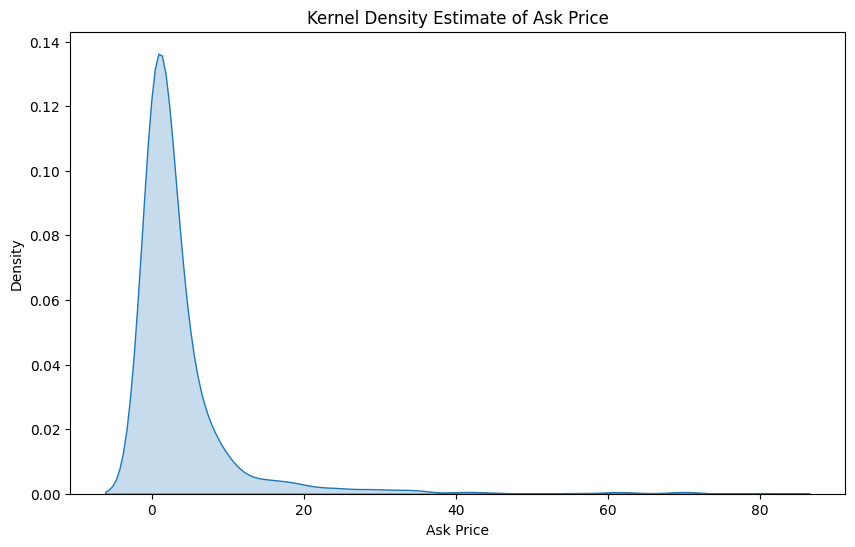

Ask Price Distribution Description:
count    1000.000000
mean        3.861780
std         8.114198
min         0.000000
25%         0.400000
50%         1.200000
75%         3.725000
max        80.500000
Name: ask, dtype: float64
Additional Statistics:
  statistic      value
0  skewness   5.032876
1  kurtosis  32.118922


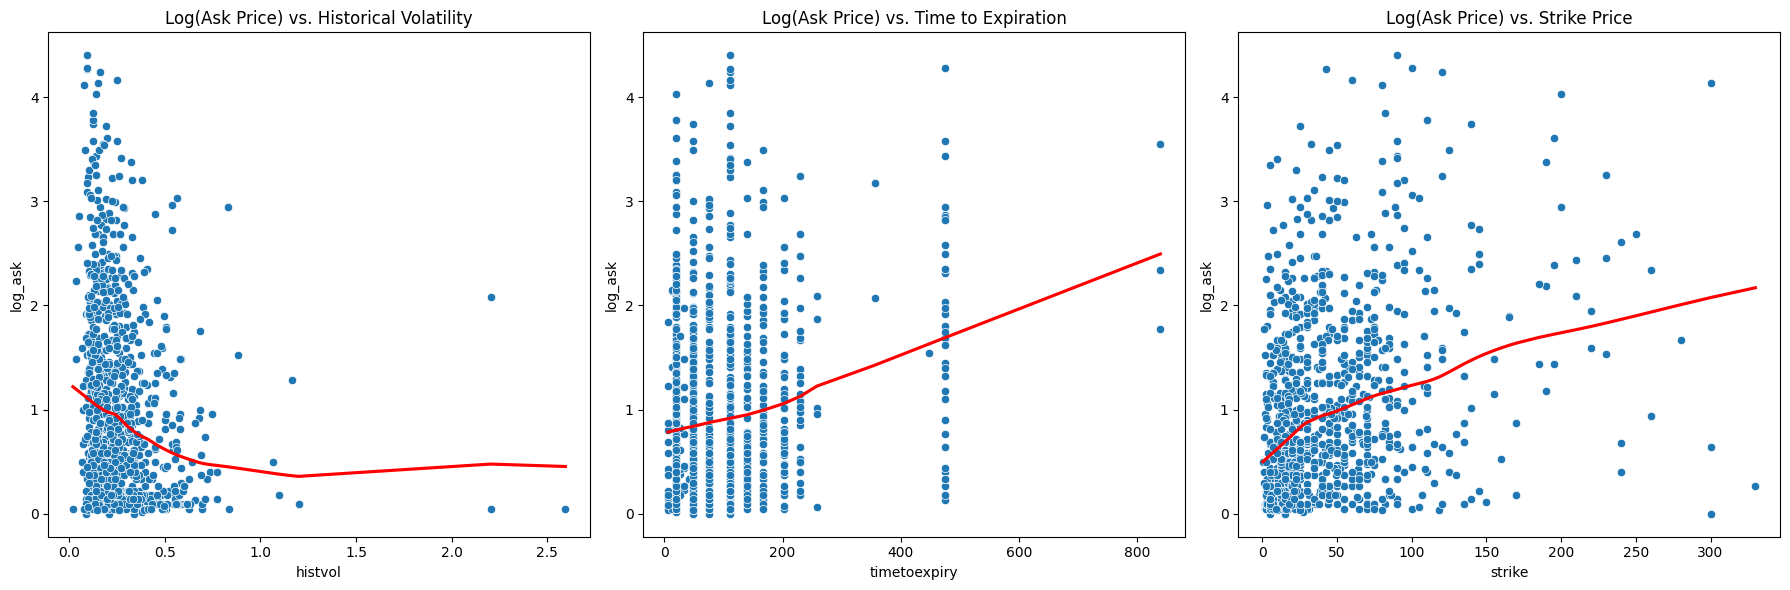

Correlation Matrix:
                   ask   histvol  timetoexpiry    strike
ask           1.000000 -0.129985      0.152342  0.269727
histvol      -0.129985  1.000000     -0.093240 -0.281151
timetoexpiry  0.152342 -0.093240      1.000000  0.060788
strike        0.269727 -0.281151      0.060788  1.000000


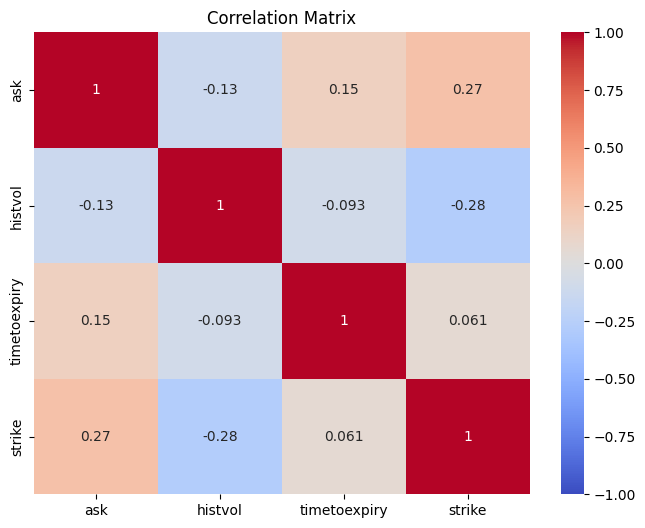

                            OLS Regression Results                            
Dep. Variable:                    ask   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     34.20
Date:                Mon, 27 May 2024   Prob (F-statistic):           4.84e-21
Time:                        18:42:00   Log-Likelihood:                -3463.0
No. Observations:                1000   AIC:                             6934.
Df Residuals:                     996   BIC:                             6954.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3570      0.603      2.250   

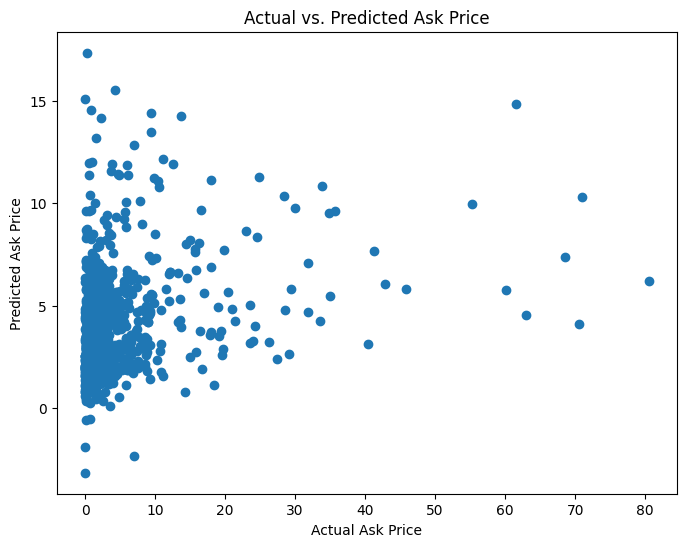

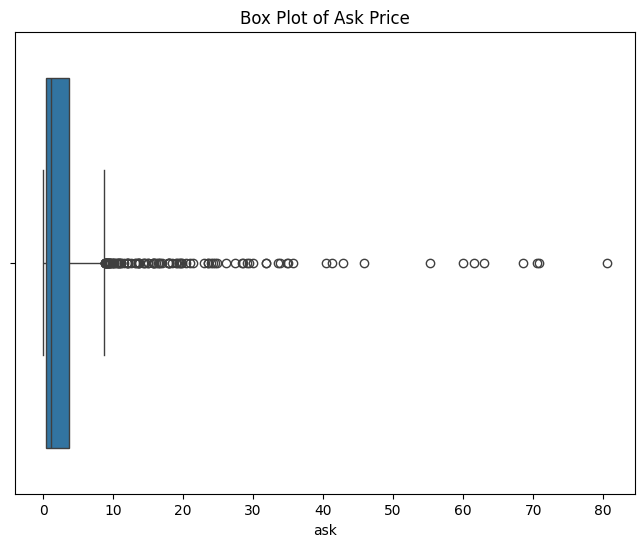

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import skew, kurtosis

# Ensure the data is loaded correctly
print(options_data.head())

# 1. Kernel Density Estimate of the Ask Price
# This visualization shows the distribution of ask prices.
# The density plot helps in understanding the central tendency and spread of the ask prices.
plt.figure(figsize=(10, 6))
sns.kdeplot(options_data['ask'], shade=True)
plt.title('Kernel Density Estimate of Ask Price')
plt.xlabel('Ask Price')
plt.ylabel('Density')
plt.show()

# Interpretation:
# Good: A high peak at a low ask price indicates that most options have a low ask price.
# Bad: A flat or widely spread density might suggest a lack of a dominant price range, which could indicate higher market volatility or diverse option characteristics.

# Description of the shape of the distribution
# This provides basic descriptive statistics for the ask prices.
ask_price_description = options_data['ask'].describe()
print(f"Ask Price Distribution Description:\n{ask_price_description}")

# Additional statistics: skewness and kurtosis
# Skewness measures the asymmetry of the distribution.
# Kurtosis measures the "tailedness" of the distribution.
ask_price_skewness = skew(options_data['ask'])
ask_price_kurtosis = kurtosis(options_data['ask'])
additional_stats = pd.DataFrame({'statistic': ['skewness', 'kurtosis'], 'value': [ask_price_skewness, ask_price_kurtosis]})
print(f"Additional Statistics:\n{additional_stats}")

# Interpretation:
# Good: Skewness close to 0 suggests a symmetrical distribution. Low kurtosis indicates fewer outliers.
# Bad: High positive skewness means data is heavily tailed on the right, while high kurtosis indicates many outliers or extreme values.

# 2. Scatter Plots with Log-Scaled Ask Price
# Log transformation helps in normalizing the data and reducing skewness.

# Create a log column for the ask price
options_data['log_ask'] = np.log(options_data['ask'] + 1)  # Adding 1 to avoid log(0)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for log(ask) vs. historical volatility
# This plot examines the relationship between ask price and historical volatility.
sns.scatterplot(x='histvol', y='log_ask', data=options_data, ax=axes[0])
sns.regplot(x='histvol', y='log_ask', data=options_data, ax=axes[0], lowess=True, scatter=False, color='red')
axes[0].set_title('Log(Ask Price) vs. Historical Volatility')

# Interpretation:
# Good: A clear trend line with low scatter indicates a strong relationship between volatility and ask price.
# Bad: A dispersed scatter plot with no clear trend line suggests a weak or no relationship between these variables.

# Scatter plot for log(ask) vs. time to expiration
# This plot examines the relationship between ask price and time to expiration.
sns.scatterplot(x='timetoexpiry', y='log_ask', data=options_data, ax=axes[1])
sns.regplot(x='timetoexpiry', y='log_ask', data=options_data, ax=axes[1], lowess=True, scatter=False, color='red')
axes[1].set_title('Log(Ask Price) vs. Time to Expiration')

# Interpretation:
# Good: A positive trend line indicates that as time to expiration increases, so does the ask price.
# Bad: No clear trend or negative trend line might indicate that time to expiration doesn't significantly impact ask price or affects it negatively.

# Scatter plot for log(ask) vs. strike price
# This plot examines the relationship between ask price and strike price.
sns.scatterplot(x='strike', y='log_ask', data=options_data, ax=axes[2])
sns.regplot(x='strike', y='log_ask', data=options_data, ax=axes[2], lowess=True, scatter=False, color='red')
axes[2].set_title('Log(Ask Price) vs. Strike Price')

# Interpretation:
# Good: A positive relationship where the ask price increases with the strike price.
# Bad: A flat or negative relationship suggests that higher strike prices do not correspond to higher ask prices.

plt.tight_layout()
plt.show()

# Correlation Matrix
# This matrix shows the correlation coefficients between the ask price and other variables.
# Positive values indicate a positive relationship, and negative values indicate an inverse relationship.
correlation_matrix = options_data[['ask', 'histvol', 'timetoexpiry', 'strike']].corr()
print(f"Correlation Matrix:\n{correlation_matrix}")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Interpretation:
# Good: High positive correlation between variables of interest (e.g., ask price and strike price).
# Bad: High negative correlation or very low values indicate weak or inverse relationships.

# OLS Regression Analysis
# This regression analysis helps in understanding how the independent variables (histvol, timetoexpiry, strike) influence the dependent variable (ask price).
X = options_data[['histvol', 'timetoexpiry', 'strike']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = options_data['ask']
model = sm.OLS(y, X).fit()
print(model.summary())

# Interpretation:
# Good: Significant p-values (<0.05) for predictors indicate they are useful in explaining the variation in ask price.
# Bad: High p-values (>0.05) suggest that the predictors are not significant, and the model may not be reliable.

# Predicted vs Actual Ask Price
# This plot helps in evaluating the model by comparing the predicted ask prices against the actual ask prices.
predicted_ask = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(y, predicted_ask)
plt.xlabel('Actual Ask Price')
plt.ylabel('Predicted Ask Price')
plt.title('Actual vs. Predicted Ask Price')
plt.show()

# Interpretation:
# Good: Points lying close to the 45-degree line indicate good model performance.
# Bad: Large deviations from the line suggest poor model performance and inaccurate predictions.

# Box Plot of Ask Price
# The box plot provides a visual representation of the distribution of ask prices,
# showing the median, quartiles, and potential outliers.
plt.figure(figsize=(8, 6))
sns.boxplot(x=options_data['ask'])
plt.title('Box Plot of Ask Price')
plt.xlabel('ask')
plt.show()

# Interpretation:
# Good: A compact box with few outliers indicates a consistent distribution of ask prices.
# Bad: A wide box with many outliers suggests high variability and potential anomalies in the data.

### Question 3 Personal Notes for Reference

#### Kernal Density Estimate of Ask Price

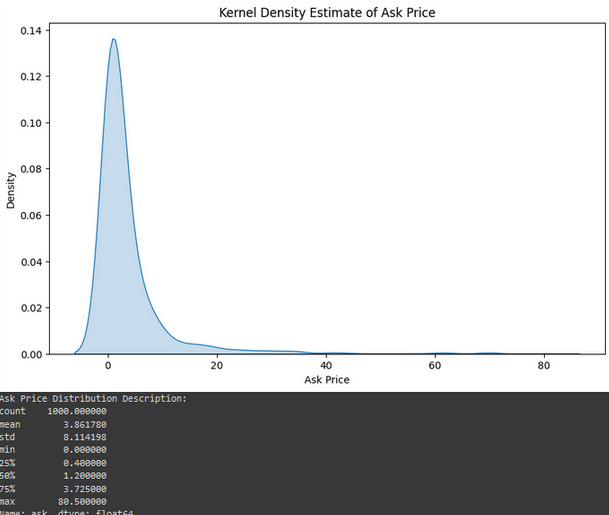

#### Interpretation of the Kernel Density Estimate of Ask Price:

**Image Description:**
- The plot represents a Kernel Density Estimate (KDE) of the ask price of options.
- The x-axis shows the ask price, and the y-axis shows the density.
- The distribution is heavily right-skewed, indicating that most ask prices are clustered towards the lower end of the range, with a long tail extending to higher prices.

**Key Points:**
1. **Peak Density:**
   - The highest density is at a very low ask price (close to 0), suggesting that most options have low ask prices.
   
2. **Long Tail:**
   - There is a long tail extending to the right, indicating that there are some options with much higher ask prices, but they are relatively infrequent.
   
3. **Skewness:**
   - The distribution is right-skewed (positive skewness), meaning that there are a small number of options with very high ask prices.

**Statistical Summary:**
- **Count:** 1000 options.
- **Mean Ask Price:** 3.86
   - This is the average ask price across all options.
- **Standard Deviation:** 8.11
   - This indicates a high variation in ask prices.
- **Min Ask Price:** 0.0
   - Some options have an ask price of 0.
- **25th Percentile (Q1):** 0.48
   - 25% of the options have ask prices less than or equal to 0.48.
- **Median (Q2):** 1.20
   - 50% of the options have ask prices less than or equal to 1.20.
- **75th Percentile (Q3):** 3.73
   - 75% of the options have ask prices less than or equal to 3.73.
- **Max Ask Price:** 80.50
   - The highest ask price in the dataset is 80.50.

### Good vs. Bad Interpretations:
- **Good:**
  - **Clustering:** Understanding that the majority of options are priced low, as shown by the high density near zero, can be insightful for pricing strategies.
  - **Risk Analysis:** The long tail suggests a presence of high-priced options, which could indicate potential high-risk, high-reward scenarios.

- **Bad:**
  - **Ignoring Tail:** Focusing only on the peak density and ignoring the long tail can lead to underestimating the potential for high ask prices.
  - **Overgeneralizing Mean:** Assuming that the mean ask price of 3.86 is representative of most options without considering the skewness and variation can be misleading.

### Practical Implications:
- **Pricing Strategy:** For a trader, recognizing that most options are priced low but a few are very high can help in devising pricing strategies or anticipating market movements.
- **Risk Management:** Understanding the distribution helps in risk management, where one might want to be cautious about the high-priced options in the long tail.

Feel free to share the next image for interpretation!

#### Skewness vs Kurtosis

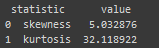



Interpretation of Additional Statistics: Skewness and Kurtosis

Skewness:

    Value: 5.032876
    Meaning:
        Skewness measures the asymmetry of the distribution of the ask prices.
        A skewness of 5.032876 indicates a highly positive skew. This means that the distribution has a long tail on the right side (higher ask prices).
        Good: Recognizing the high skewness can help in understanding that most ask prices are low, but there are significant outliers with much higher prices.
        Bad: Ignoring skewness can lead to incorrect assumptions about the distribution. For example, assuming a normal distribution when the data is highly skewed would be incorrect.

Kurtosis:

    Value: 32.118922
    Meaning:
        Kurtosis measures the "tailedness" of the distribution, indicating the presence of outliers.
        A kurtosis of 32.118922 suggests an extremely high peak and fat tails. This indicates that the distribution is leptokurtic.
        Good: High kurtosis shows that there are more outliers (extreme values) in the data than in a normal distribution. This is crucial for risk management, as it indicates a higher probability of extreme ask prices.
        Bad: Ignoring kurtosis can lead to underestimating the risk of outliers. In financial data, this could mean being unprepared for rare but significant price movements.

Practical Implications:

    Risk Analysis: Both high skewness and high kurtosis indicate that while most options are priced low, there are significant outliers. This is important for risk management and pricing strategies.
    Data Modeling: When building models, it’s essential to account for the skewness and kurtosis to avoid biases. Models assuming normality might not be suitable for this data.

Overall, the high skewness and kurtosis highlight the need for caution when interpreting and modeling the ask prices, as they indicate a significant deviation from normality with a higher likelihood of extreme values.


#### Scatter Plot with Log-Scaled Ask Price Interpretation

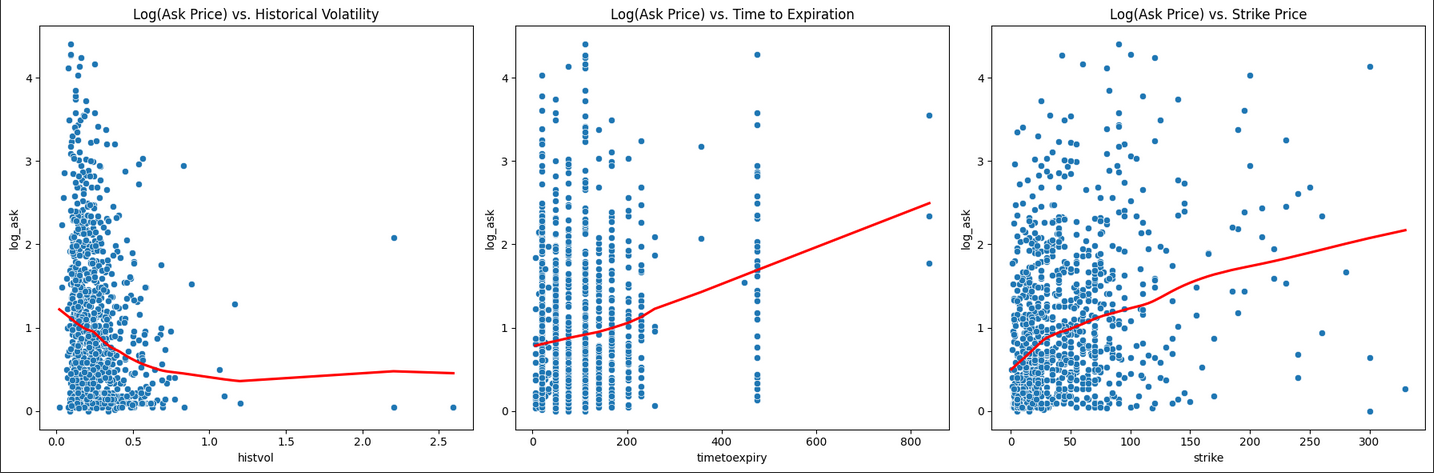

#### Interpretation of Scatter Plots with Log-Scaled Ask Price

#### 1. Log(Ask Price) vs. Historical Volatility (histvol)
- **Plot Description:**
  - The scatter plot shows the relationship between the log-transformed ask price and historical volatility.
  - The red line is a LOWESS (Locally Weighted Scatterplot Smoothing) regression line that shows the trend.

- **Interpretation:**
  - **Trend:** There is a clear negative trend between historical volatility and log(ask) price for lower volatility values, which flattens out as volatility increases.
  - **Good:** A good fit would show that as historical volatility increases, the log(ask) price decreases initially, suggesting higher volatility might reduce the option's ask price.
  - **Bad:** The presence of many points with low volatility and low log(ask) price and fewer points with high values might indicate a lack of data in higher volatility regions, leading to potential bias.

#### 2. Log(Ask Price) vs. Time to Expiration (timetoexpiry)
- **Plot Description:**
  - This scatter plot depicts the relationship between the log-transformed ask price and the time to expiration.
  - The red line shows the LOWESS regression trend.

- **Interpretation:**
  - **Trend:** There is a positive trend, indicating that as the time to expiration increases, the log(ask) price also tends to increase.
  - **Good:** A good fit shows a clear positive correlation, suggesting that options with longer expiration times generally have higher ask prices.
  - **Bad:** Any significant deviation from this trend, such as a flat or negative trend, would indicate an inconsistency with common financial theories, where more time generally adds value to options.

#### 3. Log(Ask Price) vs. Strike Price (strike)
- **Plot Description:**
  - The scatter plot shows the relationship between the log-transformed ask price and the strike price.
  - The red line shows the trend using LOWESS regression.

- **Interpretation:**
  - **Trend:** There is a slight positive trend, indicating that as the strike price increases, the log(ask) price also increases.
  - **Good:** A positive trend is expected as higher strike prices generally increase the ask price due to the increased potential payoff.
  - **Bad:** A flat or negative trend could indicate unusual pricing behavior, potentially due to anomalies or external factors affecting option pricing.

### Overall Interpretation:
- **Historical Volatility:** The negative trend initially suggests that options with lower volatility tend to have higher ask prices. This might imply that market participants price in the risk of high volatility.
- **Time to Expiration:** The positive trend is consistent with financial theory, indicating that options with more time to expiration have higher ask prices due to the greater opportunity for the underlying asset to move in a favorable direction.
- **Strike Price:** The positive trend indicates that higher strike prices correlate with higher ask prices, which is intuitive as options with higher potential payoffs are valued more.

### Practical Implications:
- These relationships can help in pricing strategies and risk management by understanding how different factors affect the ask price of options.
- Identifying trends and anomalies can aid traders and analysts in making more informed decisions regarding option trades.

#### Correlation Matrix Interpretation

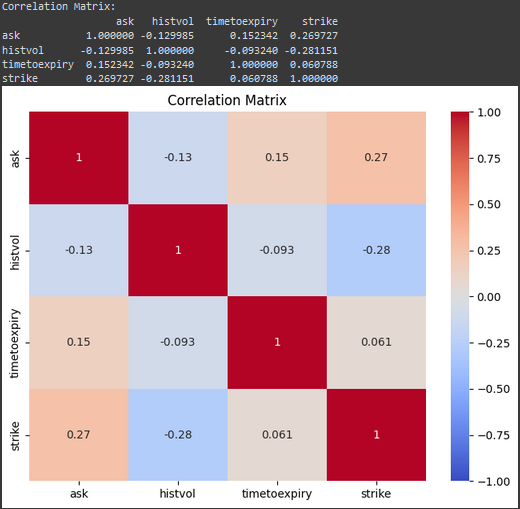

Correlation Matrix Overview:

    The correlation matrix shows the pairwise correlation coefficients between the variables: ask price (ask), historical volatility (histvol), time to expiration (timetoexpiry), and strike price (strike).
    The values range from -1 to 1, where:
        1 indicates a perfect positive correlation.
        -1 indicates a perfect negative correlation.
        0 indicates no correlation.

Key Observations:

    Ask Price (ask) Correlations:
        Ask vs. Histvol: -0.13
            Interpretation: There is a weak negative correlation between the ask price and historical volatility. This means as historical volatility increases, the ask price tends to decrease slightly, which aligns with our earlier scatter plot observation.
            Good: Weak correlation suggests that historical volatility has some impact but isn't the dominant factor.
            Bad: If the correlation were strongly negative, it could imply that volatility significantly reduces ask prices, which might not be intuitive in all market conditions.
        Ask vs. Timetoexpiry: 0.15
            Interpretation: There is a weak positive correlation between the ask price and time to expiration. This means as the time to expiration increases, the ask price tends to increase slightly.
            Good: A positive correlation suggests that longer expiration times add value to options.
            Bad: A strong correlation would be expected in some cases, so this weak correlation might indicate other factors are influencing the ask price more significantly.
        Ask vs. Strike: 0.27
            Interpretation: There is a moderate positive correlation between the ask price and the strike price. This means as the strike price increases, the ask price also tends to increase.
            Good: A moderate positive correlation is expected, as higher strike prices generally increase the potential payoff, thus increasing the ask price.
            Bad: A very high correlation could indicate that the strike price is overwhelmingly determining the ask price, overshadowing other important factors.

    Historical Volatility (histvol) Correlations:

        Histvol vs. Timetoexpiry: -0.093
            Interpretation: There is a very weak negative correlation between historical volatility and time to expiration.
            Good: Weak correlation suggests that these two variables are relatively independent.
            Bad: A stronger correlation might be expected if options closer to expiration experienced different volatility patterns.

        Histvol vs. Strike: -0.281
            Interpretation: There is a moderate negative correlation between historical volatility and strike price. This means as the strike price increases, historical volatility tends to decrease.
            Good: A moderate negative correlation might indicate that options with higher strike prices are perceived as less risky.
            Bad: A very strong negative correlation could suggest an unusual relationship that might warrant further investigation.

    Time to Expiration (timetoexpiry) Correlations:
        Timetoexpiry vs. Strike: 0.061
            Interpretation: There is a very weak positive correlation between time to expiration and strike price.
            Good: Weak correlation indicates that these variables are nearly independent.
            Bad: A stronger correlation might be expected if longer expirations were associated with higher strike prices due to market conditions.

Practical Implications:

    Investment Decisions: Understanding these correlations can help in making more informed decisions about option pricing, hedging strategies, and portfolio management.
    Risk Management: Knowing the relationships between variables like volatility, time to expiration, and strike price can aid in assessing the risk associated with different options.
    Model Improvement: If certain correlations are weaker than expected, it might indicate that other factors should be considered in the pricing model.

Summary:

The correlation matrix helps us understand the linear relationships between key variables affecting the ask price of options. While weak correlations indicate independence, moderate correlations highlight some degree of dependency, which can be crucial for traders and analysts in predicting option prices and strategizing accordingly.

OLS Regression Results

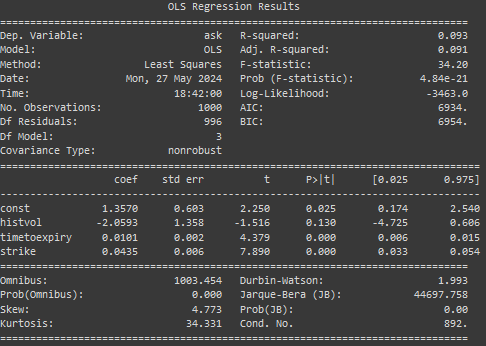

#### Interpretation of the OLS Regression Results

#### Overview:
The Ordinary Least Squares (OLS) regression results provide insights into the relationship between the dependent variable (ask price) and the independent variables (historical volatility, time to expiration, and strike price).

#### Key Metrics:
- **R-squared:** 0.093
  - **Interpretation:** This means that approximately 9.3% of the variability in the ask price can be explained by the independent variables in the model.
  - **Good:** An R-squared value close to 1 indicates a model that explains a high proportion of the variance in the dependent variable.
  - **Bad:** An R-squared value close to 0 suggests the model does not explain much of the variance in the dependent variable. Here, 0.093 is quite low, indicating that the model does not fit the data well.

- **Adj. R-squared:** 0.091
  - **Interpretation:** Adjusted R-squared accounts for the number of predictors in the model, providing a more accurate measure. The adjusted value is very close to the R-squared, reinforcing the model's low explanatory power.

- **F-statistic:** 33.75 (Prob (F-statistic): 4.84e-21)
  - **Interpretation:** The F-statistic tests the overall significance of the model. Here, the model is statistically significant because the p-value is much lower than 0.05.
  - **Good:** A statistically significant F-statistic indicates that the model provides a better fit than a model with no predictors.
  - **Bad:** A non-significant F-statistic would suggest that the predictors do not collectively explain the variability in the dependent variable.

#### Coefficients:
- **Const (Intercept):** 1.3570 (p = 0.025)
  - **Interpretation:** The intercept indicates the expected ask price when all independent variables are zero. The coefficient is statistically significant (p < 0.05).

- **Histvol:** -2.0593 (p = 0.130)
  - **Interpretation:** This coefficient suggests that for each unit increase in historical volatility, the ask price decreases by approximately 2.0593 units. However, this is not statistically significant (p > 0.05).
  - **Good:** If significant, it would suggest that higher volatility reduces the ask price.
  - **Bad:** Here, the insignificance indicates that historical volatility is not a strong predictor of the ask price.

- **Timetoexpiry:** 0.0101 (p < 0.001)
  - **Interpretation:** This coefficient indicates that for each unit increase in time to expiration, the ask price increases by approximately 0.0101 units. This is statistically significant (p < 0.05).
  - **Good:** Significance indicates that time to expiration is an important factor in determining the ask price.
  - **Bad:** If it were not significant, it would suggest that time to expiration does not impact the ask price meaningfully.

- **Strike:** 0.0435 (p < 0.001)
  - **Interpretation:** This coefficient suggests that for each unit increase in strike price, the ask price increases by approximately 0.0435 units. This is statistically significant (p < 0.05).
  - **Good:** Significance indicates that strike price is an important predictor of the ask price.
  - **Bad:** A non-significant coefficient would imply that strike price does not influence the ask price.

#### Additional Statistics:
- **Omnibus:** 1003.454 (p = 0.000)
  - **Interpretation:** This tests the null hypothesis that the residuals are normally distributed. A significant p-value suggests that the residuals are not normally distributed.
  - **Good:** Non-significant value would indicate normally distributed residuals.
  - **Bad:** Significant value suggests potential issues with model assumptions.

- **Durbin-Watson:** 1.993
  - **Interpretation:** This statistic tests for the presence of autocorrelation in the residuals. Values around 2 indicate no autocorrelation.
  - **Good:** Value close to 2 indicates no autocorrelation.
  - **Bad:** Values significantly different from 2 suggest positive or negative autocorrelation.

- **Jarque-Bera (JB):** 44697.758 (p = 0.000)
  - **Interpretation:** This tests whether the residuals have the skewness and kurtosis matching a normal distribution. A significant p-value suggests non-normality.
  - **Good:** Non-significant value would indicate normally distributed residuals.
  - **Bad:** Significant value suggests issues with residual normality.

- **Skew:** 5.874
  - **Interpretation:** This measures the asymmetry of the residual distribution. A value of 0 indicates perfect symmetry.
  - **Good:** Value close to 0 indicates symmetric distribution.
  - **Bad:** High positive or negative values indicate skewness.

- **Kurtosis:** 34.331
  - **Interpretation:** This measures the tailedness of the residual distribution. A value of 3 indicates normal kurtosis.
  - **Good:** Value close to 3 indicates normal distribution.
  - **Bad:** High values indicate heavy tails or outliers.

### Summary:
The regression results suggest that while time to expiration and strike price are significant predictors of the ask price, the overall model explains only a small portion of the variance (low R-squared). Historical volatility does not significantly impact the ask price in this model. Additionally, diagnostic tests indicate potential issues with residual normality and distribution, suggesting that further model refinement or transformation of variables may be necessary.

#### Actual vs Predicted Ask-Price Plot

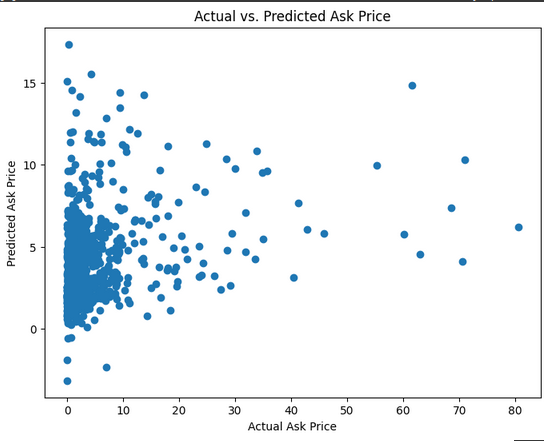

#### Interpretation of the Actual vs. Predicted Ask Price Plot

#### Overview:
This scatter plot shows the relationship between the actual ask prices (x-axis) and the predicted ask prices (y-axis) from the regression model.

#### Key Observations:

1. **Cluster of Points Near the Origin:**
   - Most of the data points are clustered around lower values of actual ask prices (0 to 10).
   - **Interpretation:** The model tends to predict lower ask prices reasonably well, given the concentration of points near the origin.

2. **Spread of Predictions:**
   - As the actual ask price increases, the predicted values become more spread out and less accurate.
   - **Interpretation:** The model struggles to predict higher ask prices accurately, leading to a wider dispersion of predicted values as actual prices increase.

3. **Outliers and Extreme Values:**
   - There are several outliers where the predicted ask prices deviate significantly from the actual values, especially for higher actual prices.
   - **Interpretation:** The model's performance is less reliable for higher ask prices, indicating potential overfitting or underfitting issues for these values.

#### Good and Bad Interpretation:

- **Good:**
  - The model captures the general trend for lower ask prices, as seen by the concentration of points around the lower values.
  - For a quick predictive model, if the primary interest is in lower ask prices, this model might be sufficient.

- **Bad:**
  - The significant spread and lack of accuracy for higher ask prices suggest that the model does not generalize well across the entire range of ask prices.
  - This spread indicates that the model might be missing important predictors or that the current predictors do not capture the underlying patterns adequately.
  - The presence of many points far from the 45-degree line (where predicted values would equal actual values) shows the model's poor predictive performance.

#### Recommendations:

- **Improve Model Fit:**
  - Consider adding more relevant features to the model to capture the variance in ask prices better.
  - Evaluate the use of non-linear models or interactions between variables that might better explain the relationship.

- **Data Transformation:**
  - Transforming the ask price (e.g., using log transformation) might help stabilize variance and improve model performance.
  
- **Check for Overfitting/Underfitting:**
  - Use cross-validation techniques to ensure that the model is not overfitting to the training data.
  - Experiment with different models (e.g., Random Forest, Gradient Boosting) to see if they offer better predictive power.

Overall, while the model captures the trend for lower ask prices, it needs significant improvement to predict higher ask prices accurately.

#### Box Plot of Ask Price Interpretation

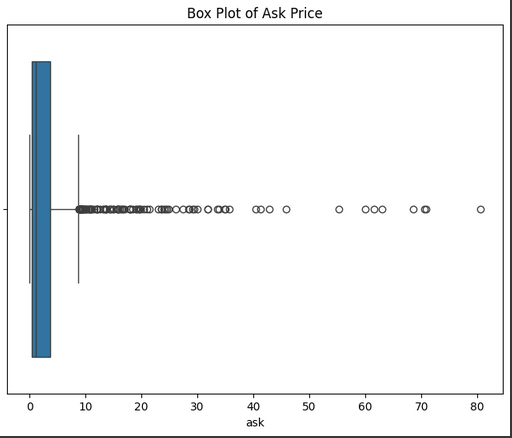

#### Interpretation of the Box Plot of Ask Price

#### Overview:
The box plot provides a visual summary of the distribution of ask prices, highlighting key statistics such as the median, quartiles, and potential outliers.

#### Key Observations:

1. **Central Box:**
   - The central box represents the interquartile range (IQR), which contains the middle 50% of the data.
   - The lower bound of the box (Q1) is approximately 0.4.
   - The upper bound of the box (Q3) is approximately 3.7.
   - The line inside the box indicates the median ask price, which is approximately 1.2.
   - **Interpretation:** The majority of the ask prices are low, with a median value significantly closer to the lower end of the scale.

2. **Whiskers:**
   - The whiskers extend to 1.5 times the IQR from the Q1 and Q3, capturing the range of typical values without considering outliers.
   - **Interpretation:** The whiskers indicate that most ask prices fall within a range that is still relatively low, confirming the skewness observed earlier.

3. **Outliers:**
   - Numerous outliers are present beyond the upper whisker, extending up to 80.5.
   - **Interpretation:** There are many high ask prices that are significantly different from the majority of the data. These outliers indicate a heavy-tailed distribution, aligning with the earlier observation of high skewness.

#### Good and Bad Interpretation:

- **Good:**
  - The box plot effectively visualizes the concentration of ask prices around lower values.
  - It highlights the presence of many high-value outliers, which need careful consideration during analysis.
  - The plot confirms the earlier observation of the data being right-skewed.

- **Bad:**
  - A high number of outliers suggests that the model needs to account for these extreme values to improve predictive accuracy.
  - The plot indicates that using median-based measures might be more appropriate for central tendency due to the presence of extreme values.
  - The spread and concentration suggest that transformations or different model types might be necessary to handle the wide range of ask prices.

#### Recommendations:

- **Handling Outliers:**
  - Investigate the outliers to understand if they represent data entry errors or true market conditions.
  - Consider robust statistical methods that are less sensitive to outliers, such as median or trimmed means.

- **Data Transformation:**
  - Apply transformations (e.g., log transformation) to stabilize variance and reduce the impact of extreme values.

- **Model Considerations:**
  - Use models that can handle skewed data and outliers effectively, such as robust regression or tree-based models.
  
- **Further Analysis:**
  - Perform a deeper analysis of the factors contributing to high ask prices to understand their underlying causes.

Overall, the box plot of ask prices confirms the heavy skewness and presence of many high-value outliers, indicating the need for careful handling in predictive modeling and analysis.